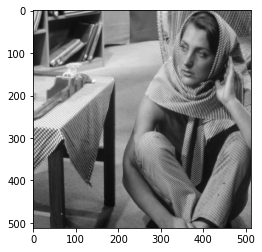

In [6]:
import os 
os.chdir(r"G:\Mi unidad\2021-I\optimizacion\admm-matrix-completion")

from data import load_data
from core.utils import Mask
import matplotlib.pyplot as plt


DATA_DIR = r".\imgs"

img = load_data(DATA_DIR)[0] / 255

plt.imshow(img, cmap='gray')

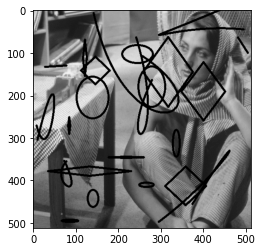

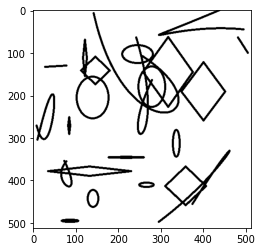

In [7]:
MODE = "irregular"
mask = Mask(mode=MODE, prcnt=0.8)

corrupted , mask =  mask(img)
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()

In [8]:
import bm3d

denoised = bm3d.bm3d(corrupted, sigma_psd=67, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)


In [9]:
from core.admm import ADMM


admm = ADMM()

    
estimated = admm.restore(corrupted, mask, sol=img, iters=100)


ITERATION 0 - ERRROR 107.45692492644923
ITERATION 1 - ERRROR 186.8574792032917
ITERATION 2 - ERRROR 54.181653117679595
ITERATION 3 - ERRROR 46.32558050036244
ITERATION 4 - ERRROR 46.86974623987378
ITERATION 5 - ERRROR 49.87842884734072
ITERATION 6 - ERRROR 53.67647498829777
ITERATION 7 - ERRROR 57.72572730219535


KeyboardInterrupt: 

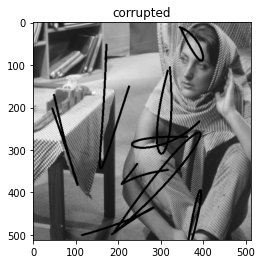

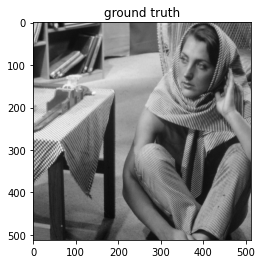

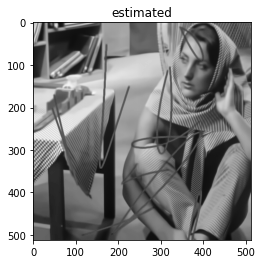

In [ ]:
plt.title("corrupted")
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.title("ground truth")
plt.imshow(img, cmap='gray')
plt.show()


plt.title("estimated")
plt.imshow(estimated, cmap='gray')
plt.show()